In [1]:
import multiprocessing  #import for parallel processing
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing



Detect the Number of Cores on PC and subtract 1

In [3]:
cores = multiprocessing.cpu_count() - 1

print(cores)

7

In [4]:
data = pd.read_csv("/dbfs/FileStore/tables/final_project.csv")

In [5]:
data.describe()

Out[ 4 ]: 
 x0 x1 x2 x3 \
count 159974.000000 159975.000000 159962.000000 159963.000000 
mean -0.001028 0.001358 -1.150145 -0.024637 
std 0.371137 6.340632 13.273480 8.065032 
min -1.592635 -26.278302 -59.394048 -35.476594 
25% -0.251641 -4.260973 -10.166536 -5.454438 
50% -0.002047 0.004813 -1.340932 -0.031408 
75% 0.248532 4.284220 7.871676 5.445179 
max 1.600849 27.988178 63.545653 38.906025 

 x4 x5 x6 x7 \
count 159974.000000 159963.000000 159974.000000 159973.000000 
mean -0.000549 0.013582 -1.670670 -7.692795 
std 6.382293 7.670076 19.298665 30.542264 
min -28.467536 -33.822988 -86.354483 -181.506976 
25% -4.313118 -5.148130 -14.780146 -27.324771 
50% 0.000857 0.014118 -1.948594 -6.956789 
75% 4.306660 5.190749 11.446931 12.217071 
max 26.247812 35.550110 92.390605 149.150634 

 x8 x9 ... x41 \
count 159979.000000 159970.000000 ... 159960.000000 
mean -0.030540 0.005462 ... 6.701076 
std 8.901185 6.355040 ... 18.680196 
min -37.691045 -27.980659 ... -82.167224 
25% -6.031058 -4.260619 ... -5.804080 
50% -0.016840 0.006045 ... 6.840110 
75% 5.972349 4.305734 ... 19.266367 
max 39.049831 27.377842 ... 100.050432 

 x42 x43 x44 x45 \
count 159974.000000 159963.000000 159960.000000 159971.000000 
mean -1.833820 -0.002091 -0.006250 0.000885 
std 5.110705 1.534952 4.164595 0.396621 
min -27.933750 -6.876234 -17.983487 -1.753221 
25% -5.162869 -1.039677 -2.812055 -0.266518 
50% -1.923754 -0.004385 -0.010484 0.001645 
75% 1.453507 1.033275 2.783274 0.269049 
max 22.668041 6.680922 19.069759 1.669205 

 x46 x47 x48 x49 \
count 159969.000000 159963.000000 159968.000000 159968.000000 
mean -12.755395 0.028622 -0.000224 -0.674224 
std 36.608641 4.788157 1.935501 15.036738 
min -201.826828 -21.086333 -8.490155 -65.791191 
25% -36.428329 -3.216016 -1.320800 -10.931753 
50% -12.982497 0.035865 -0.011993 -0.574410 
75% 11.445443 3.268028 1.317703 9.651072 
max 150.859415 20.836854 8.226552 66.877604 

 y 
count 160000.000000 
mean 0.401231 
std 0.490149 
min 0.000000 
25% 0.000000 
50% 0.000000 
75% 1.000000 
max 1.000000 

[8 rows x 46 columns]

In [6]:
list(data.dtypes)

Out[ 5 ]: 
[dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('O'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('O'),
 dtype('O'),
 dtype('float64'),
 dtype('O'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('O'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('int64')]

### Seperate features from target

In [8]:
X = data.drop(['y'], axis = 1)
y = data['y']

In [9]:
cat_col = list(X.loc[:, X.dtypes == object].columns)
num_col = list(X.loc[:, X.dtypes == float].columns)

In [10]:
cat_col

Out[ 8 ]: ['x24', 'x29', 'x30', 'x32', 'x37']

In [11]:
num_col

Out[ 9 ]: 
['x0',
 'x1',
 'x2',
 'x3',
 'x4',
 'x5',
 'x6',
 'x7',
 'x8',
 'x9',
 'x10',
 'x11',
 'x12',
 'x13',
 'x14',
 'x15',
 'x16',
 'x17',
 'x18',
 'x19',
 'x20',
 'x21',
 'x22',
 'x23',
 'x25',
 'x26',
 'x27',
 'x28',
 'x31',
 'x33',
 'x34',
 'x35',
 'x36',
 'x38',
 'x39',
 'x40',
 'x41',
 'x42',
 'x43',
 'x44',
 'x45',
 'x46',
 'x47',
 'x48',
 'x49']

In [12]:
cats = (X.loc[:, X.dtypes == object])
nums = (X.loc[:, X.dtypes == float])

Two columns appear to be numeric, but show as objects because of symbols. Changing this to float.

In [14]:
dollars = cats[cats.columns[4]].replace('[\$,]', '', regex=True).astype(float)

In [15]:
cats = cats.drop('x37', axis = 1)

In [16]:
percentages = cats[cats.columns[3]].replace('[\%,]', '', regex=True).astype(float)

In [17]:
cats = cats.drop('x32', axis = 1)

In [18]:
concat_num = pd.concat([nums, dollars, percentages], axis = 1)

In [19]:
cats.head()

Out[ 16 ]: 
 x24 x29 x30
0 euorpe July tuesday
1 asia Aug wednesday
2 asia July wednesday
3 asia July wednesday
4 asia July tuesday

In [20]:
cats.isnull().sum()

Out[ 17 ]: 
x24 28
x29 30
x30 30
dtype: int64

It appears that we have categorical variables that are missing which we will have to fill in differently.

In [22]:
cats.fillna(value = 'None', inplace = True)

In [23]:
cats.isnull().sum()

Out[ 19 ]: 
x24 0
x29 0
x30 0
dtype: int64

Now fill in the numeric columns with average of column for missing values.

In [25]:
concat_num = concat_num.apply(lambda x: x.fillna(x.mean()),axis=0)

In [26]:
dummies = pd.get_dummies(cats, prefix = ['continent','month','day'])

In [27]:
dummies.head()

Out[ 22 ]: 
 continent_None continent_america continent_asia continent_euorpe \
0 0 0 0 1 
1 0 0 1 0 
2 0 0 1 0 
3 0 0 1 0 
4 0 0 1 0 

 month_Apr month_Aug month_Dev month_Feb month_January month_July \
0 0 0 0 0 0 1 
1 0 1 0 0 0 0 
2 0 0 0 0 0 1 
3 0 0 0 0 0 1 
4 0 0 0 0 0 1 

 ... month_None month_Nov month_Oct month_sept. day_None \
0 ... 0 0 0 0 0 
1 ... 0 0 0 0 0 
2 ... 0 0 0 0 0 
3 ... 0 0 0 0 0 
4 ... 0 0 0 0 0 

 day_friday day_monday day_thurday day_tuesday day_wednesday 
0 0 0 0 1 0 
1 0 0 0 0 1 
2 0 0 0 0 1 
3 0 0 0 0 1 
4 0 0 0 1 0 

[5 rows x 23 columns]

In [28]:
newX =  pd.concat([concat_num, dummies ], axis = 1)

In [29]:
newX.head()

Out[ 24 ]: 
 x0 x1 x2 x3 x4 x5 x6 \
0 -0.166563 -3.961588 4.621113 2.481908 -1.800135 0.804684 6.718751 
1 -0.149894 -0.585676 27.839856 4.152333 6.426802 -2.426943 40.477058 
2 -0.321707 -1.429819 12.251561 6.586874 -5.304647 -11.311090 17.812850 
3 -0.245594 5.076677 -24.149632 3.637307 6.505811 2.290224 -35.111751 
4 -0.273366 0.306326 -11.352593 1.676758 2.928441 -0.616824 -16.505817 

 x7 x8 x9 ... month_None month_Nov \
0 -14.789997 -1.040673 -4.204950 ... 0 0 
1 -6.725709 0.896421 0.330165 ... 0 0 
2 11.060572 5.325880 -2.632984 ... 0 0 
3 -18.913592 -0.337041 -5.568076 ... 0 0 
4 27.532281 1.199715 -4.309105 ... 0 0 

 month_Oct month_sept. day_None day_friday day_monday day_thurday \
0 0 0 0 0 0 0 
1 0 0 0 0 0 0 
2 0 0 0 0 0 0 
3 0 0 0 0 0 0 
4 0 0 0 0 0 0 

 day_tuesday day_wednesday 
0 1 0 
1 0 1 
2 0 1 
3 0 1 
4 1 0 

[5 rows x 70 columns]

In [30]:
corr = newX.corr()

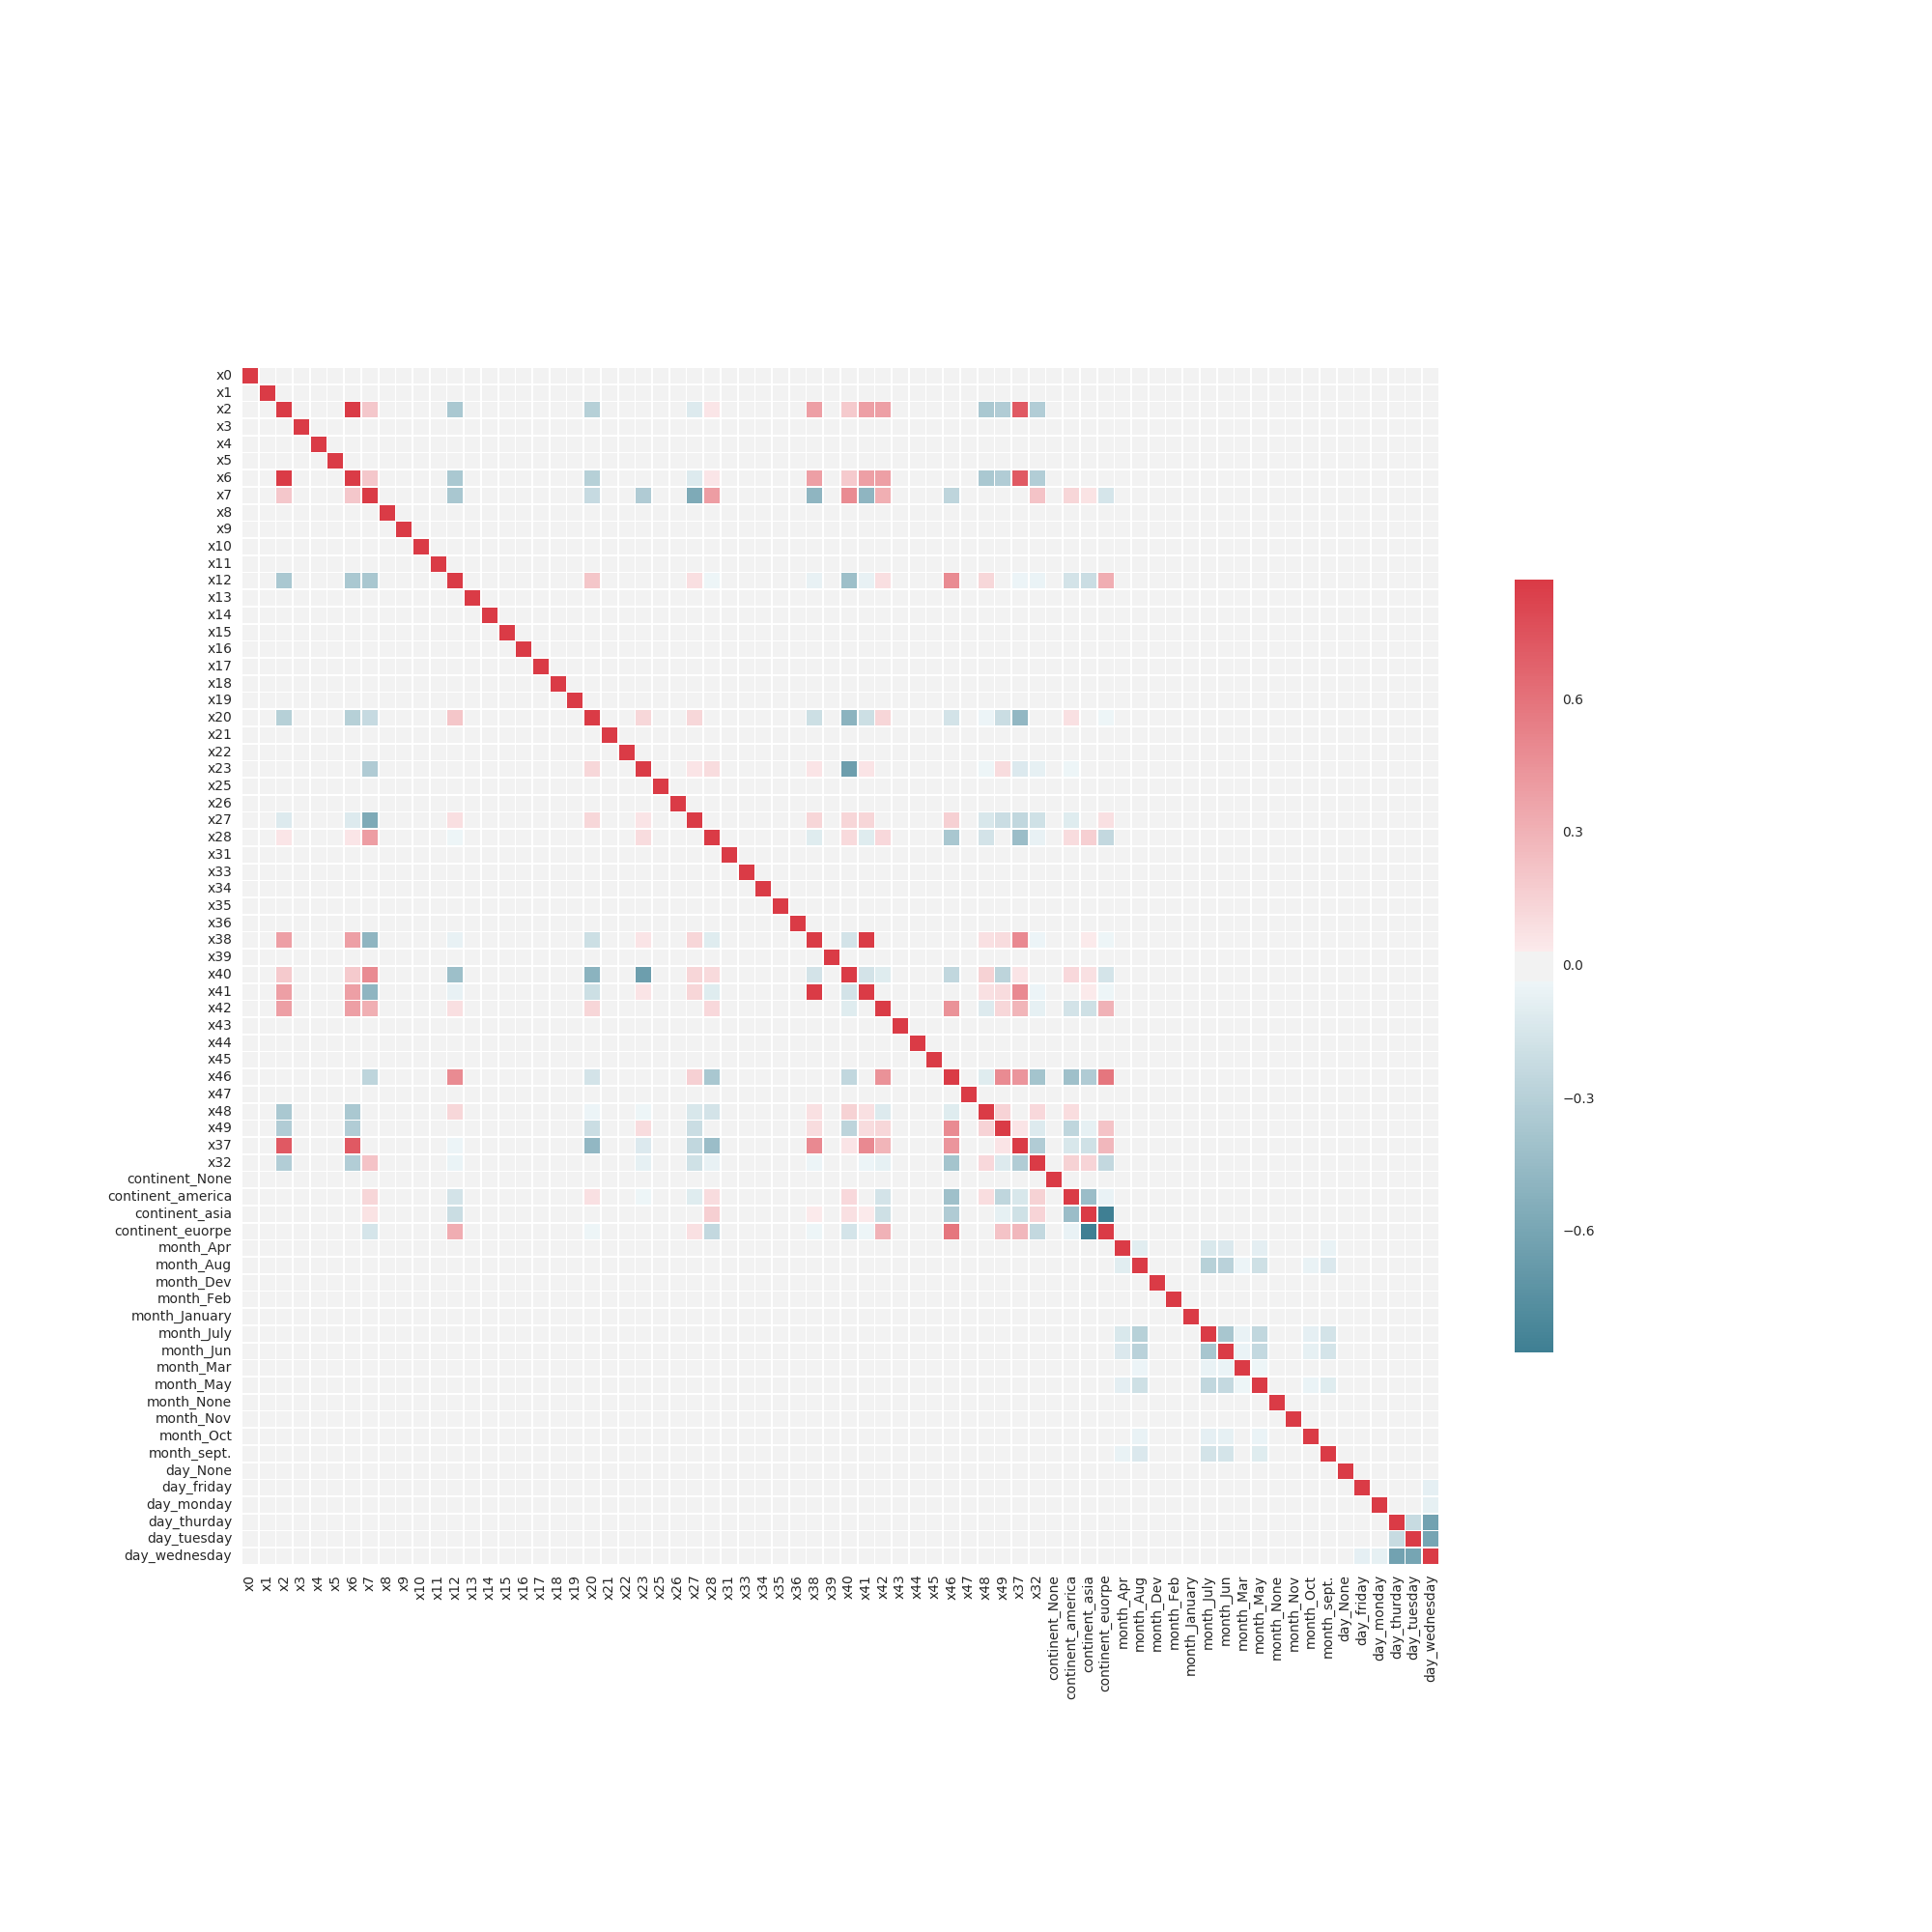

In [31]:
# Generate a mask for the upper triangle
#mask = np.zeros_like(corr, dtype=np.bool)
#mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(20, 20))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr,  cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

display(plt.show())

## Scale the Data

In [33]:
X_scaled = preprocessing.scale(newX)

## Create Interaction of variables using Poly features

In [35]:
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(2)

X_poly = poly.fit_transform(X_scaled)


In [36]:
X_poly.shape

Out[ 48 ]: (160000, 2556)

In [37]:
from sklearn.model_selection import train_test_split 

X_train, X_test, y_train, y_test = train_test_split(X_poly,y, test_size = .3, random_state = 1234)

In [39]:
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.feature_selection import SelectFromModel

clf = ExtraTreesClassifier(random_state = 1234)
clf = clf.fit(X_train, y_train)
importances = clf.feature_importances_
sfm = SelectFromModel(clf, prefit = True, threshold = '.05*mean')
n_features = sfm.transform(X_train).shape[1]
print('Number of Features selected:')
print(n_features)



Number of Features selected:
2493

In [40]:
X_train = pd.DataFrame(X_train)
X_test = pd.DataFrame(X_test)

In [41]:
ft = list(zip(X_train.columns, sfm.get_support()))
print('Features selected:')
print(ft)

Features selected:
[(0, False), (1, True), (2, True), (3, True), (4, True), (5, True), (6, True), (7, True), (8, True), (9, True), (10, True), (11, True), (12, True), (13, True), (14, True), (15, True), (16, True), (17, True), (18, True), (19, True), (20, True), (21, True), (22, True), (23, True), (24, True), (25, True), (26, True), (27, True), (28, True), (29, True), (30, True), (31, True), (32, True), (33, True), (34, True), (35, True), (36, True), (37, True), (38, True), (39, True), (40, True), (41, True), (42, True), (43, True), (44, True), (45, True), (46, True), (47, True), (48, False), (49, True), (50, True), (51, True), (52, True), (53, True), (54, False), (55, False), (56, False), (57, True), (58, True), (59, False), (60, True), (61, False), (62, False), (63, True), (64, True), (65, False), (66, False), (67, False), (68, True), (69, True), (70, True), (71, True), (72, True), (73, True), (74, True), (75, True), (76, True), (77, True), (78, True), (79, True), (80, True), (81, True), (82, True), (83, True), (84, True), (85, True), (86, True), (87, True), (88, True), (89, True), (90, True), (91, True), (92, True), (93, True), (94, True), (95, True), (96, True), (97, True), (98, True), (99, True), (100, True), (101, True), (102, True), (103, True), (104, True), (105, True), (106, True), (107, True), (108, True), (109, True), (110, True), (111, True), (112, True), (113, True), (114, True), (115, True), (116, True), (117, True), (118, True), (119, True), (120, True), (121, True), (122, True), (123, True), (124, True), (125, True), (126, True), (127, True), (128, True), (129, True), (130, True), (131, True), (132, True), (133, True), (134, True), (135, True), (136, True), (137, True), (138, True), (139, True), (140, True), (141, True), (142, True), (143, True), (144, True), (145, True), (146, True), (147, True), (148, True), (149, True), (150, True), (151, True), (152, True), (153, True), (154, True), (155, True), (156, True), (157, True), (158, True), (159, True), (160, True), (161, True), (162, True), (163, True), (164, True), (165, True), (166, True), (167, True), (168, True), (169, True), (170, True), (171, True), (172, True), (173, True), (174, True), (175, True), (176, True), (177, True), (178, True), (179, True), (180, True), (181, True), (182, True), (183, True), (184, True), (185, True), (186, True), (187, True), (188, True), (189, True), (190, True), (191, True), (192, True), (193, True), (194, True), (195, True), (196, True), (197, True), (198, True), (199, True), (200, True), (201, True), (202, True), (203, True), (204, True), (205, True), (206, True), (207, True), (208, True), (209, True), (210, True), (211, True), (212, True), (213, True), (214, True), (215, True), (216, True), (217, True), (218, True), (219, True), (220, True), (221, True), (222, True), (223, True), (224, True), (225, True), (226, True), (227, True), (228, True), (229, True), (230, True), (231, True), (232, True), (233, True), (234, True), (235, True), (236, True), (237, True), (238, True), (239, True), (240, True), (241, True), (242, True), (243, True), (244, True), (245, True), (246, True), (247, True), (248, True), (249, True), (250, True), (251, True), (252, True), (253, True), (254, True), (255, True), (256, True), (257, True), (258, True), (259, True), (260, True), (261, True), (262, True), (263, True), (264, True), (265, True), (266, True), (267, True), (268, True), (269, True), (270, True), (271, True), (272, True), (273, True), (274, True), (275, True), (276, True), (277, True), (278, True), (279, True), (280, True), (281, True), (282, True), (283, True), (284, True), (285, True), (286, True), (287, True), (288, True), (289, True), (290, True), (291, True), (292, True), (293, True), (294, True), (295, True), (296, True), (297, True), (298, True), (299, True), (300, True), (301, True), (302, True), (303, True), (304, True), (305, True), (306, True), (307, True), (308, True), (309, True), (310, True), (311, True), (312, True), (313, True

In [42]:
selected = [x[0] for x in ft if x[1] == True]
X_selected = X_train[selected]
X_selected_test = X_test[selected]


print("Shape of X with reduced feature:")
print(np.shape(X_selected))

Shape of X with reduced feature:
(112000, 2493)

In [43]:
#https://www.youtube.com/watch?v=t63PS3kiTTQ   --watch this vid to install spark on your machine
#pip install pyspark
#pip install sckit_spark



In [44]:
#from pyspark.sql import SparkSession
#from pyspark import SparkContext as sc

#spark = SparkSession.builder\
#    .master("local[7]")\
#    .appName("skspark-grid-search-doctests")\
#    .getOrCreate()

#sc = SparkContext.getOrCreate(SparkConf().setMaster("local[7]"))

#data = 

In [45]:
#from pyspark import SparkContext, SparkConf
#from spark_sklearn import GridSearchCV

#conf = SparkConf().setMaster("local[7]")  ##put in your number of cores minus 1
#sc = SparkContext(conf=conf)

In [46]:
from pyspark import broadcast
import pickle


def broadcast_dump(self, value, f):
    pickle.dump(value, f, 4)  # was 2, 4 is first protocol supporting >4GB
    f.close()
    
    return f.name


broadcast.Broadcast.dump = broadcast_dump

In [47]:
from sklearn.ensemble import RandomForestClassifier
from sklearn import grid_search
from spark_sklearn import GridSearchCV


param_grid = {
    'bootstrap': [True],
    'max_depth': [80, 90, 100, 110],
    'max_features': [2, 3],
    'min_samples_leaf': [3, 4, 5],
    'min_samples_split': [8, 10, 12],
    'n_estimators': [100, 200, 300, 1000]
}
# Create a based model
rf = RandomForestClassifier(random_state = 1234)
# Instantiate the grid search model
grid_search = GridSearchCV(sc, estimator = rf, param_grid = param_grid, cv = 3, n_jobs = -1, verbose = 2, scoring = 'f1')

grid_search.fit(X_selected, y_train)



Fitting 3 folds for each of 288 candidates, totalling 864 fits
 Out[ 50 ]: 
GridSearchCV(cv=3, error_score='raise',
 estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
 max_depth=None, max_features='auto', max_leaf_nodes=None,
 min_impurity_split=1e-07, min_samples_leaf=1,
 min_samples_split=2, min_weight_fraction_leaf=0.0,
 n_estimators=10, n_jobs=1, oob_score=False, random_state=1234,
 verbose=0, warm_start=False),
 fit_params={}, iid=True, n_jobs=-1,
 param_grid={'min_samples_leaf': [3, 4, 5], 'bootstrap': [True], 'max_depth': [80, 90, 100, 110], 'min_samples_split': [8, 10, 12], 'n_estimators': [100, 200, 300, 1000], 'max_features': [2, 3]},
 pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
 sc=<SparkContext master=spark://10.93.55.242:7077 appName=Databricks Shell>,
 scoring='f1', verbose=2)

In [48]:
print(grid_search.best_params_)

{'min_samples_leaf': 3, 'bootstrap': True, 'max_depth': 80, 'max_features': 3, 'n_estimators': 1000, 'min_samples_split': 10}

In [49]:
y_pred = grid_search.predict(X_selected_test)

In [50]:
# Model Evaluation metrics 
from sklearn.metrics import accuracy_score,recall_score,precision_score,f1_score
print('Accuracy Score : ' + str(accuracy_score(y_test,y_pred)))
print('Precision Score : ' + str(precision_score(y_test,y_pred)))
print('Recall Score : ' + str(recall_score(y_test,y_pred)))
print('F1 Score : ' + str(f1_score(y_test,y_pred)))

#Logistic Regression Classifier Confusion matrix
from sklearn.metrics import confusion_matrix
print('Confusion Matrix : \n' + str(confusion_matrix(y_test,y_pred)))




Accuracy Score : 0.864020833333
Precision Score : 0.919574411842
Recall Score : 0.723797139142
F1 Score : 0.810024158105
Confusion Matrix : 
[[27558 1217]
 [ 5310 13915]]

In [51]:
from sklearn.linear_model import LogisticRegression

param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000] }
lr = LogisticRegression(random_state = 1234)

grid_search = GridSearchCV(sc, cv=None,
             estimator=LogisticRegression(C=1.0, intercept_scaling=1,   
               dual=False, fit_intercept=True, penalty='l2', tol=0.0001),
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]})

grid_search.fit(X_selected, y_train)


Out[ 67 ]: 
GridSearchCV(cv=None, error_score='raise',
 estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
 intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
 penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
 verbose=0, warm_start=False),
 fit_params={}, iid=True, n_jobs=1,
 param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]},
 pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
 sc=<SparkContext master=spark://10.93.55.242:7077 appName=Databricks Shell>,
 scoring=None, verbose=0)

In [52]:
print(grid_search.best_params_)

{'C': 0.01}

In [53]:
y_pred = grid_search.predict(X_selected_test)

In [54]:
print('Accuracy Score : ' + str(accuracy_score(y_test,y_pred)))
print('Precision Score : ' + str(precision_score(y_test,y_pred)))
print('Recall Score : ' + str(recall_score(y_test,y_pred)))
print('F1 Score : ' + str(f1_score(y_test,y_pred)))
print('Confusion Matrix : \n' + str(confusion_matrix(y_test,y_pred)))




Accuracy Score : 0.871270833333
Precision Score : 0.847633766787
Recall Score : 0.827308192458
F1 Score : 0.837347653268
Confusion Matrix : 
[[25916 2859]
 [ 3320 15905]]